## 1

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import missingno as msn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
교차 검증 MSE: -0.6162337806164521
테스트 MSE: 5633.068155793262
테스트 R^2: 0.8893455830696774


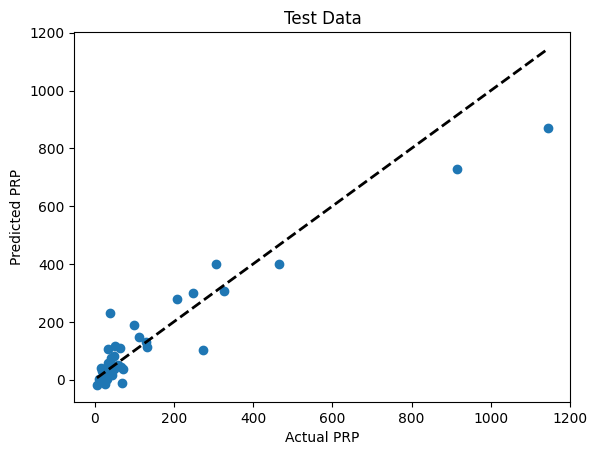

In [38]:
data = pd.read_csv("machine.data_update.csv")
data
data.columns

#데이터 정보
data.info()

# 결측치 확인
data.isnull().sum()

# 데이터 분리
features = data[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']]
target = data['PRP']

# 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# 모델 훈련, 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 교차 검증
cv_scores = cross_val_score(model, features_scaled, target, cv=5)
cv_mse = -cv_scores.mean()
print(f"교차 검증 MSE: {cv_mse}")

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"테스트 MSE: {mse}")
print(f"테스트 R^2: {r2}")

# 시각화
plt.scatter(y_test, y_pred)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## 2

Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
None
VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64
교차 검증 MSE: -0.6162337806164521
훈련 데이터 MSE: 3117.6589054301

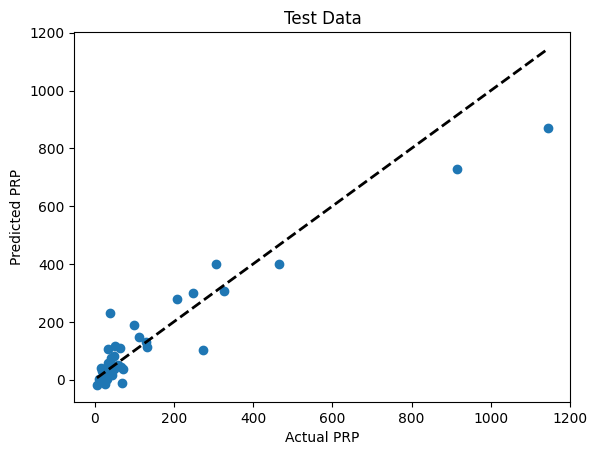

In [39]:
# 데이터 로드
data = pd.read_csv("machine.data_update.csv")

# 데이터 컬럼 확인
print(data.columns)

# 데이터 정보 출력
print(data.info())

# 결측치 확인
print(data.isnull().sum())

# 특성과 타겟 분리
features = data[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']]
target = data['PRP']

# 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# 모델 훈련 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 교차 검증 (전체 데이터)
cv_scores = cross_val_score(model, features_scaled, target, cv=5)
cv_mse = -cv_scores.mean()
print(f"교차 검증 MSE: {cv_mse}")

# 훈련 데이터에 대한 성능 평가
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"훈련 데이터 MSE: {train_mse}")
print(f"훈련 데이터 MAE: {train_mae}")
print(f"훈련 데이터 R^2: {train_r2}")

# 테스트 데이터에 대한 성능 평가
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"테스트 데이터 MSE: {test_mse}")
print(f"테스트 데이터 MAE: {test_mae}")
print(f"테스트 데이터 R^2: {test_r2}")

# 테스트 데이터 시각화
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## 3

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV R^2: 0.74766484922621
랜덤 포레스트 테스트 데이터 MSE: 1398.6522909664
랜덤 포레스트 테스트 데이터 MAE: 16.204154549303063
랜덤 포레스트 테스트 데이터 R^2: 0.9725252651903423


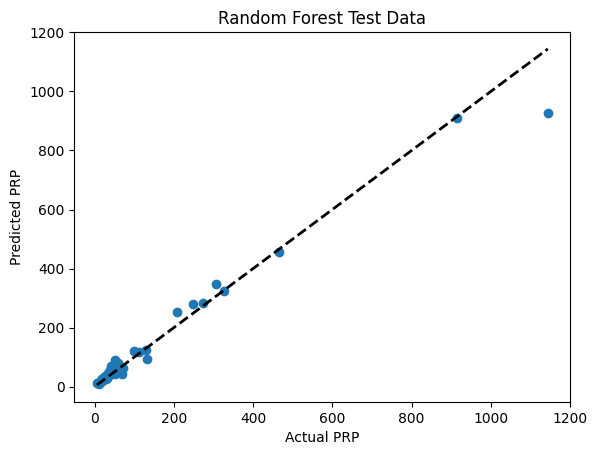

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 데이터 로드
data = pd.read_csv("machine.data_update.csv")
features = data[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']]
target = data['PRP']

# 스케일링
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 모델 선택 및 훈련
rf_model = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],       
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]      
}

# GridSearchCV 설정 및 모델 학습
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(features_scaled, target)

# 최적 파라미터 출력
print("Best Parameters:", grid_search.best_params_)
print("Best CV R^2:", grid_search.best_score_)

# 최적 모델로 예측
best_rf_model = grid_search.best_estimator_

# 예측 결과 확인
y_test_pred_rf = best_rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
print(f"랜덤 포레스트 테스트 데이터 MSE: {test_mse_rf}")
print(f"랜덤 포레스트 테스트 데이터 MAE: {test_mae_rf}")
print(f"랜덤 포레스트 테스트 데이터 R^2: {test_r2_rf}")

# 시각화
plt.scatter(y_test, y_test_pred_rf)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Random Forest Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()